# Fake News
Build a system to identify unreliable news articles.
Dataset is gotten from [Kaggle](https://www.kaggle.com/competitions/fake-news/data)

### Dataset Description

* `train.csv:` A full training dataset with the following attributes:

* `id:` unique id for a news article

* `title:` the title of a news article

* `author:` author of the news article

* `text:` the text of the article; could be incomplete

* `label:` a label that marks the article as potentially unreliable

* `1:` unreliable or Fake news

* `0:` reliable or True news

* `test.csv:` A testing training dataset with all the same attributes at train.csv without the label.

### 1. importing libraries

In [1]:
import pandas as pd
import numpy as np

# Visualiztion libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# NLP libraries to clean the text data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Vectorization technique TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# For Splitting the dataset
from sklearn.model_selection import train_test_split

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

# For hyperparameter Tunning
from sklearn.model_selection import GridSearchCV


#Accuracy measuring library
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

### 2. Loading the data




In [2]:
file_path = r'C:\Repo\train.csv'
data = pd.read_csv(file_path)

In [3]:
#Returns the number of rows and columns present in the dataset

data.shape 

(20800, 5)

In [4]:
# Returns the first 5 rows of the dataset
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Returns the column headings
data.columns 

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
#To check the null values in the dataset, if there're any
data.isnull().sum() 

id           0
title      558
author    1957
text        39
label        0
dtype: int64

### 3. Data-Preprocessing
For further analysis, Data cleaning is required. In this Notebook, I will clean data in three stages:

1. Removing the Null values
2. Drop features that are not needed
3. Text Processing


In [7]:
df_ = data.copy() #Creating a copy of my data, I will be working on this Dataframe

### 3.1. Removing the Null Values

* As `text` field has some empty fields, it can be handled in two ways:

 `1.` Drop the 39 rows
 
 `2.` Replace the null value with a dummy string

* I'll go with the second option because, while dropping 39 rows would have no effect on accuracy as it is such a small portion of our large dataset, it's never a good idea.
* I'm going to replace the Null(Nan) values in the `text` field with an empty `string ("")`.

In [8]:
df_['text'] = df_['text'].fillna('')   # As text is empty, just filled with an empty space

In [9]:
df_.isnull().sum()  # No null values found in the text field

id           0
title      558
author    1957
text         0
label        0
dtype: int64

### 3.2. Drop features that are not needed


In [10]:
features_dropped = ['author','title','id']
df = df_.drop(features_dropped, axis =1)

In [11]:
df.columns # Returns the needed column headings

Index(['text', 'label'], dtype='object')

### 3.3. Text Processing

1. Remove symbols `(',','-',...etc)`
2. Remove stop words
3. lemmatization

In [12]:
# Defining stop_words and lemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))

lemmatizer = WordNetLemmatizer()

# Defining clean_text function
def clean_text(text):    
    
    # Removing symbols (',','-',...etc) leaving letter and readable numeric values
    text = re.sub(r'[^A-Za-z0-9]+',' ',text)
    
    # converting all text to lower case
    text = text.lower()           
    
    # spliting and returning all words to their dictionary form or root form using list comprehension
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]   # returns words dictionary meaning 
    text = [lemmatizer.lemmatize(token) for token in text]   # splits and single word into smaller piece
    
    # eliminating unimportant words like ('a','an','the') for model to focus on the most important words
    text = [word for word in text if not word in stop_words] 
    
    # to separate each words in text with whitespace
    text = " ".join(text)    
    return text

[nltk_data] Downloading package stopwords to C:\Users\HP 1030
[nltk_data]     G2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HP 1030
[nltk_data]     G2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
%%time
#Creating new column for processed it takes about 2-3mins for complete excution
df['text'] = df.text.apply(lambda x: clean_text(x))

Wall time: 3min 5s


In [14]:
df.head(10)

,text,label
0,house dem aide even see comey letter jason cha...,1
1,ever get feeling life circle roundabout rather...,0
2,truth might get fired october 29 2016 tension ...,1
3,video 15 civilian killed single u airstrike id...,1
4,print iranian woman ha sentenced six year pris...,1
5,trying time jackie mason voice reason week exc...,0
6,ever wonder britain iconic pop pianist get lon...,1
7,paris france chose idealistic traditional cand...,0
8,donald j trump scheduled make highly anticipat...,0
9,week michael flynn resigned national security ...,0


### 4. Feature Extraction 


In [15]:
X = df['text']
Y = df['label']

#Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print('the number of train data is', x_train.shape[0])
print('the number of text data is', x_test.shape[0])

the number of train data is 16640
the number of text data is 4160


In [17]:
# checking one of the texts
df['text'][3]

'video 15 civilian killed single u airstrike identified rate civilian killed american airstrikes afghanistan higher wa 2014 u wa engaged active combat operation photo hellfire missile loaded onto u military reaper drone afghanistan staff sgt brian ferguson u air force bureau ha able identify 15 civilian killed single u drone strike afghanistan last month biggest loss civilian life one strike since attack medecins sans frontieres hospital msf last october u claimed conducted counter terrorism strike islamic state fighter hit nangarhar province missile september 28 next day united nation issued unusually rapid strong statement saying strike killed 15 civilian injured 13 others gathered house celebrate tribal elder return pilgrimage mecca bureau spoke man named haji rais said wa owner house wa targeted said 15 people killed 19 others injured provided name listed bureau wa able independently verify identity died rais son headmaster local school wa among another man abdul hakim lost three s

### 5. Vectorization
This is used to handle our text data, by converting it into vectors.

In [18]:
#Vectorization
vectorization = TfidfVectorizer()

xv_train = vectorization.fit_transform(x_train)

xv_test = vectorization.transform(x_test)

In [ ]:
# Viewing the vectorized text
xv_test

### 6. Model Fitting
I will be fitting my data onto 7 classifications models

 1. Logistic Regression
 2. SVM
 3. Random Forest Classifier
 4. KNeighbors classifier
 5. Decision Tree classifier
 6. Ridge Classifier
 7. Gradient Boosting classifier

The best one amongst the 7 will be used further

In [20]:
# using different models

# puting models in dictionary
models ={'Ridge Classifier':RidgeClassifier(),
        'svm_model': SVC(),
        'Logistic Regression':LogisticRegression(),
        'Gradient Boostingclassifier':GradientBoostingClassifier(),
        'Random Forest classifier':RandomForestClassifier(),
        'Decision Tree classifier':DecisionTreeClassifier(),
        'KNeighbors classifier':KNeighborsClassifier(),}

#creating a dictionary to keep model scores
model_score = dict()

# creating a function further code re-use
def test_and_score(models, xv_train, xv_test, y_train, y_test):
    """
    fiting and evaluating different machine learning models
    models : dictionary of different models from sklearn machine learning model
    xv_train = vectorized training data 
    xv_test = vectorized testing data 
    y_train = training labels
    y_test = testing labels
    """
    # setting up a random seed
    np.random.seed(42)

    #looping through the data

    for name, model in models.items():
        model.fit(xv_train, y_train)
    # evaluating the model and appending the model into model_scores
        model_score[name] = model.score(xv_test, y_test)
    return model_score

In [21]:
%%time
# this takes about 10-25min to load

score = test_and_score(models = models, xv_train = xv_train , xv_test = xv_test, y_train = y_train, y_test = y_test)
score

Wall time: 26min 45s


{'Ridge Classifier': 0.9632211538461538,
 'svm_model': 0.9591346153846154,
 'Logistic Regression': 0.948076923076923,
 'Gradient Boostingclassifier': 0.9362980769230769,
 'Random Forest classifier': 0.9158653846153846,
 'Decision Tree classifier': 0.8870192307692307,
 'KNeighbors classifier': 0.5764423076923076}

In [22]:
# putting the accuracy score in a dataFrame
Score_df =pd.DataFrame(score, index=['accuracy_score'])
Score_df

,Ridge Classifier,svm_model,Logistic Regression,Gradient Boostingclassifier,Random Forest classifier,Decision Tree classifier,KNeighbors classifier
accuracy_score,0.963221,0.959135,0.948077,0.936298,0.915865,0.887019,0.576442


Text(0.5, 0, 'model performance')

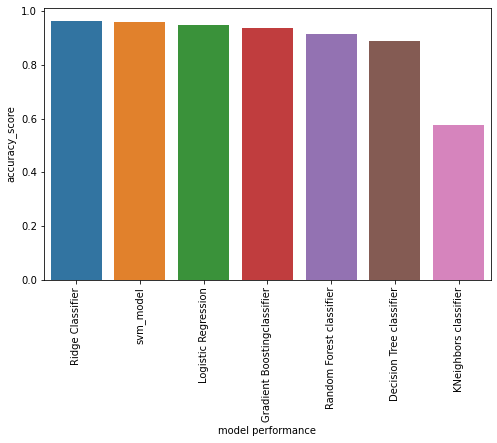

In [23]:
# visualizing the model_score result for easy grasp of the result

plt.figure(figsize=(8,5))
plt.xticks(rotation = 90)

model_compr = pd.DataFrame(data = model_score, index=['accuracy_score'])

sns.barplot(data=model_compr)
plt.ylabel('accuracy_score')
plt.xlabel('model performance')

### 7. Model Evaluation and comparison

In [24]:
# importing library that willl allow us to iterate through models dictionary

import itertools

pred_dict = dict()

# iterating through models dictionary to select the best three models
model_to_use = dict(itertools.islice(models.items(), 3))

# creating a function for further code re-use
def predict(model_to_use, xv_test):
    """
    testing and evaluating 3 different machine learning models
    pred_dict : dictionary of different models from sklearn machine learning model
    xv_test = vectorized testing data 
    """
    #looping through the data
    for name, model in model_to_use.items():
        pred_dict[name] = model.predict(xv_test)
    return pred_dict

In [25]:
%%time
# Returns each model prediction score and turn it into DatFrame for comparison

scor = predict(model_to_use=model_to_use, xv_test=xv_test)
df_pred =pd.DataFrame({'Actual':y_test, 'predicted Ridge Classifier':scor['Ridge Classifier'],
                  'predicted svm_model':scor['svm_model'],'predicted Logistic Regression':scor['Logistic Regression']})

Wall time: 1min 41s


In [26]:
# showing the first 20 predicted values of the models for comparison
df_pred.head(20)

,Actual,predicted Ridge Classifier,predicted svm_model,predicted Logistic Regression
11092,1,1,1,1
13516,1,1,1,1
5485,1,1,1,1
1140,1,1,1,1
8836,0,0,0,0
673,0,0,0,0
968,0,0,0,0
14637,0,0,0,0
9781,1,1,1,1
14431,0,0,0,0


In [27]:
# creating a function for further code re-use

def evaluation_report(y_test, pred_dict):

    """y_test = acual score
    pred_dict = a dictionary that holds the three tested models
    """
    
    #looping through the data
    for name, predict in pred_dict.items():
        
        matrix = confusion_matrix(y_test, predict)
        
        print('the accuracy_score for',name,'is',accuracy_score(y_test, predict),'\n')
        print('the classification_report for',name,'\n',classification_report(y_test, predict),'\n')
        display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Fake','True']).plot() 
        
        print('Report',name,'\n',display)
        
        plt.show()
        
    return plt.show()

the accuracy_score for Ridge Classifier is 0.9632211538461538 

the classification_report for Ridge Classifier 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2022
           1       0.96      0.97      0.96      2138

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
 

Report Ridge Classifier 


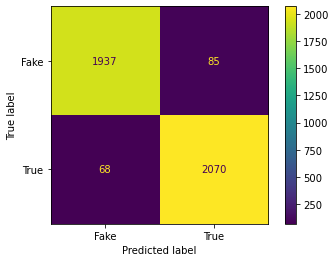

the accuracy_score for svm_model is 0.9591346153846154 

the classification_report for svm_model 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2022
           1       0.95      0.97      0.96      2138

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
 

Report svm_model 


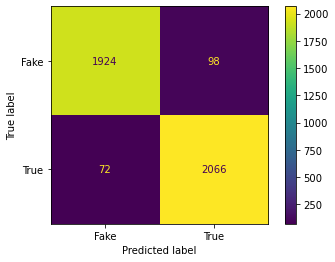

the accuracy_score for Logistic Regression is 0.948076923076923 

the classification_report for Logistic Regression 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      2022
           1       0.94      0.95      0.95      2138

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160
 

Report Logistic Regression 


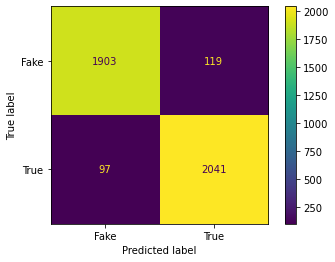

In [28]:
evaluation_report(y_test, pred_dict)

## Hyperparameter Tuning
To Check for the best kernel for SVC model, a function and for loop is created to pick the best kernel after which, i carry out hyperparameter turning on the best kernel to get the best parameters for the model.
`NOTE: it takes longer time for complete excution`

In [29]:
# A function which returns the corresponding SVC model

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def get_best_classifier(kernel_type):
    
    if kernel_type == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    
    elif kernel_type == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    
    elif kernel_type == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    
    elif kernel_type == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

for i in range(4):
    # Train a SVC model using different kernal
    svc_model = get_best_classifier(i) 
    
    svc_model.fit(xv_train, y_train)
    # print best parameter after tuning 
    
    y_pred = svc_model.predict(xv_test) # Make prediction
    
    print("Evaluation:", kernels[i], "kernel") # Evaluate our model
    
    print(classification_report(y_test,y_pred))
    
    # print best train score after tuning 
    print("Test Score: ", svc_model.score(xv_test, y_test))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.49      1.00      0.65      2022
           1       0.00      0.00      0.00      2138

    accuracy                           0.49      4160
   macro avg       0.24      0.50      0.33      4160
weighted avg       0.24      0.49      0.32      4160

Test Score:  0.4860576923076923
Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.49      1.00      0.65      2022
           1       0.00      0.00      0.00      2138

    accuracy                           0.49      4160
   macro avg       0.24      0.50      0.33      4160
weighted avg       0.24      0.49      0.32      4160

Test Score:  0.4860576923076923
Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.49      1.00      0.65      2022
           1       0.00      0.00      0.00      2138

    accuracy                          

###  Tuning the SCV Linear kernel to choose the best parameter.

In [39]:
para_mid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['linear']}
svm_model_ = GridSearchCV(SVC(), para_mid, cv = 5 , verbose = 3 ,refit = True, n_jobs = 3)
svm_model_

GridSearchCV(cv=5, estimator=SVC(), n_jobs=3,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [40]:
# fitting the model for grid search 
svm_model_.fit(xv_train, y_train)

# print best parameter after tuning 
print("best parameters: ",svm_model_.best_params_)

# print best train score after tuning 
print("Train SCore: ", svm_model_.best_score_ )

# print best train score after tuning 
print("Test Score: ", svm_model_.score(xv_test, y_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
best parameters:  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Train SCore:  0.9581129807692307
Test Score:  0.9617788461538461


### 8.  Manual Model Testing


In [45]:
# Because SVM provides the best results, it will be used evaluate the news authenticity.

def out_put(word):
    if word == 1:
        return "Fake News"
    elif word == 0:
        return "True News" 

    
def manual_testing(news):           
    # creating a "TECT" dictionary assigning it to "testing_news" variable.
    testing_news = {"text":[news]}
    
    # creates a table or dataframe
    new_def_test = pd.DataFrame(testing_news)    
    
    # applied text cleaning and processing on the new text
    new_def_test["text"] = new_def_test["text"].apply(clean_text) 
    
    # assigning "new_def_test["text"]" to a new variable
    new_x_test = new_def_test["text"] 
    
    # transforming the new_x_test to vector for easy prediction by the trained model
    New_xv_test = vectorization.transform(new_x_test)
    
    # modeling the new text for possible prediction
    svm_model_prediction =svm_model_.predict(New_xv_test)

    return print('\nsvm_model_prediction: {}'.format(out_put(svm_model_prediction)))

In [46]:
news = str(input('Paste text here: \n'))
manual_testing(news)

Paste text here: 
Print Email http://humansarefree.com/2016/10/indias-stonehenge-7000-year-old.html A remarkable 7,000-year-old megalithic site that served as an astronomical observatory has been found in Muduma village in Telangana, India. The discovery has been hailed as one of the most significant archaeological findings in India over the last few decades.According to Times of India , the team of archeologists described it as "the only megalithic site in India, where a depiction of a star constellation has been identified." The ancient observatory dates to 5,000 BC and the researchers believe that it is the earliest astronomical observatory discovered in India and perhaps even in the whole of South Asia.The site consists of around 80 huge menhirs (standing stones), which are 3.5 â€“ 4 meters tall. There are also about 2000 alignment stones, which are 30-60cm tall.According to experts, no other excavation site in India has so many menhirs concentrated in such a small area. The maximu

---THE END---